### **DATASET PREPARATION:**

In this step, will prepare feature and target for given dataset to use for `Step 1`, `Step 2`, `Step 3` and `Step 4`. It includes the following process process of 
- lodaing training and testing dataset. 
- Separate features and target.
- Concatenate `title` and `descreption` features in one variable. 

In [2]:
import pandas as pd
  
def prepprocess_dataset():
    # LOAD DATASET: use (pd) library to read CSV dataset files. 
    train_dt = pd.read_csv('train.csv')
    test_dt = pd.read_csv('test.csv')

    # FEATURE & TARGET SEPARATION: To separate the target variable from the features, use the method of the DataFrame.
    X_train = train_dt[['Title', 'Description']]  # For training dataset, separate the features from target variable.
    Y_train = train_dt['Class Index'] 

    X_test = test_dt[['Title', 'Description']]  # For testing dataset, separate the features from target variable.
    Y_test = test_dt['Class Index']

    # concatenate the 'Title' and 'Description' columns into a single variable for both training and testing datasets.
    X_train['full_text'] = X_train['Title'] + ' ' + X_train['Description'] 
    X_test['full_text'] = X_test['Title'] + ' ' + X_test['Description']

    return X_train, Y_train, X_test, Y_test

## **STEP 1:**

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Preparation dataset 
X_train, Y_train, X_test, Y_test = prepprocess_dataset()

# --------------- TEXT REPRESENTATION: ------------------------------------ 
# Extract Fetures by Converting text data into a matrix of token counts using CountVectorizer.

vectorizer = CountVectorizer(
    max_features=5000,        # Limit vocabulary size
    min_df=2,                # Ignore terms that appear in less than 2 documents
    max_df=0.95,            # Ignore terms that appear in more than 95% of documents
    stop_words='english'     # Remove common English stop words
)
#vectorizer = CountVectorizer()  # Initialize the vectorizer

#vectorizer.fit(X_train['full_text'])  # Fit and transform the text data
#vectorizer.fit()  # Fit and transform the text data
X_train_TF =  vectorizer.fit_transform(X_train['full_text'])
X_test_TF =  vectorizer.transform(X_test['full_text'])

feature_names = vectorizer.get_feature_names_out() # Returns an array of all words in the vocabulary
word_features = vectorizer.vocabulary_   # Returns a dictionary mapping words to their column indices

#print(word_features.keys())

# ----------------- MODELING: ----------------------------------------------
# Use the Naive Bayes classifier to train the model.

# Split the dataset into training and testing sets
x_train, x_val, y_train, y_val = train_test_split(X_train_TF, Y_train, test_size=0.2, random_state=42)

# TRAINING ---------------------
nb = MultinomialNB() # Initialize the model
#nb = SVC(kernel='linear', decision_function_shape='ovr')

# Calculates word frequencies for each class, And computes probabilities using Naive Bayes
nb.fit(x_train, y_train)

# ------------------ EVALUATION -------------------------------------------
# Uses trained model to predict labels for validation set
y_val_pred = nb.predict(x_val)  # Make prediction on Validation set. 
val_acc = accuracy_score(y_val, y_val_pred)
print(f'Training (Validation) Accuracy: {val_acc:.2f}')  # Print the accuracy on Validation set


# calculate the accuracy of the model on the test set
test_y_pred = nb.predict(X_test_TF)  # Make prediction on test set.
test_acc = accuracy_score(Y_test, test_y_pred)
print(f'Test Accuracy: {test_acc:.2f}')   # Print the accuracy on Testing set

Training (Validation) Accuracy: 0.89
Test Accuracy: 0.89


## **STEP 2:**

In this task, will implement TF-IDF as text represenation. use Naive Baise classifier to training and make prediction.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Preparation dataset 
X_train, Y_train, X_test, Y_test = prepprocess_dataset()

# --------------- TEXT REPRESENTATION: ------------------------------------ 
# create a tfidf vectorizer object 
tfidf_vect = TfidfVectorizer(
    max_features=5000,        # Limit vocabulary size
    min_df=2,                # Ignore terms that appear in less than 2 documents
    max_df=0.95,            # Ignore terms that appear in more than 95% of documents
    stop_words='english'     # Remove common English stop words
)

tfidf_vect.fit(X_train['full_text'])

X_train_tfidf =  tfidf_vect.transform(X_train['full_text'])
X_test_tfidf =  tfidf_vect.transform(X_test['full_text'])

# ----------------- MODELING: ----------------------------------------------
# Use the Naive Bayes classifier to train the model.

# Split the dataset into training and testing sets
x_train, x_val, y_train, y_val = train_test_split(X_train_tfidf, Y_train, test_size=0.3, random_state=42)

# TRAINING ---------------------
nb = MultinomialNB() # Initialize the model
#nb = SVC(kernel='linear', decision_function_shape='ovr')  # 'ovr' for One-vs-Rest

# Calculates word frequencies for each class, And computes probabilities using Naive Bayes
nb.fit(x_train, y_train)

# ------------------ EVALUATION -------------------------------------------
# Uses trained model to predict labels for validation set
y_val_pred = nb.predict(x_val)  # Make prediction on Validation set. 
val_acc = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)
print(f'Training (Validation) Accuracy: {val_acc:.2f}')  # Print the accuracy on Validation set
print(f'Training (Validation) Report: {val_report}')

# calculate the accuracy of the model on the test set
test_y_pred = nb.predict(X_test_tfidf)  # Make prediction on test set.
test_acc = accuracy_score(Y_test, test_y_pred)
text_report = classification_report(Y_test, test_y_pred)
print(f'Test Accuracy: {test_acc:.2f}')   # Print the accuracy on Testing set
print(f'Test Report: {text_report}')


print(tfidf_vect.get_feature_names_out())
print(tfidf_vect.idf_)

#print(X_train_tfidf.toarray())


Training (Validation) Accuracy: 0.89
Training (Validation) Report:               precision    recall  f1-score   support

           1       0.90      0.89      0.90      8932
           2       0.94      0.97      0.96      9096
           3       0.86      0.85      0.86      8943
           4       0.87      0.86      0.87      9029

    accuracy                           0.89     36000
   macro avg       0.89      0.89      0.89     36000
weighted avg       0.89      0.89      0.89     36000

Test Accuracy: 0.89
Test Report:               precision    recall  f1-score   support

           1       0.90      0.89      0.90      1900
           2       0.94      0.97      0.96      1900
           3       0.87      0.84      0.85      1900
           4       0.87      0.86      0.86      1900

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600

['00' '000' '04' ... 'zone' 'z

## **STEP 3:**

Text Classification using CNN network.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 85, 50)            4570950   
                                                                 
 conv1d (Conv1D)             (None, 84, 32)            3232      
                                                                 
 global_max_pooling1d (Glob  (None, 32)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 165       
                                                        

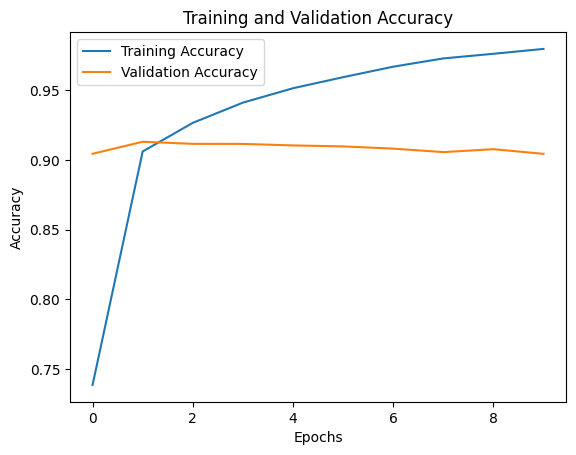

750/750 [==============================] - 5s 5ms/step - loss: 0.4686 - accuracy: 0.9043
Evaluation Set Loss: 0.4686, Test Accuracy: 0.9043
238/238 [==============================] - 2s 6ms/step
Prediction Accuracy on Testing dataset: 0.8951


In [47]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import RandomUniform
import matplotlib.pyplot as plt
from tensorflow.keras.backend import clear_session

# Preparation dataset 
X_train, Y_train, X_test, Y_test = prepprocess_dataset()

# Clear the previous session
clear_session()

# SPLITING: Split the data into training and test sets
x_train, x_val, y_train, y_val = train_test_split(X_train['full_text'], Y_train, test_size=0.2, random_state=42)

# PARAMETERS -------------------------------------------------------------

# ------------------------------ TEXT REPRESENTATION -------------------------------
vocab_size = 10000  # # The number of unique words in the vocabulary or get the length of the feature names from the CountVectorizer
max_length = 85 # means all input sequences will have a length of 100. Shorter sequences are padded with zeros to ensure uniform input size.

# TOKINIZATION ---------------------------------------
# Tokenize the text data, process of splitting text into words and convert it into numerical sequence

# 1. create a tokenizer that convert sentence to words.
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index  # A dictionary mapping each word to a unique integer (e.g., {"the": 1, "cat": 2, "sat": 3}). This is created after fitting the tokenizer.
 
#  2. CONVERT TOKENS TO SEQUENCE: convert the text to sequence of tokens and pad them to ensure equal length vectors.
train_seq = tokenizer.texts_to_sequences(x_train)
val_seq = tokenizer.texts_to_sequences(x_val)
test_seq = tokenizer.texts_to_sequences(X_test['full_text'])

X_train_seq = sequence.pad_sequences(train_seq, maxlen=max_length)
X_val_seq = sequence.pad_sequences(val_seq, maxlen=max_length)
X_test_seq = sequence.pad_sequences(test_seq, maxlen=max_length)

# 3. ENCODING TARGET: convert the target variable into a one-hot encoded vector.
Y_train_encoder = to_categorical(y_train)
Y_val_encoder = to_categorical(y_val)
Y_test_encoder = to_categorical(Y_test)

# --------------------------------- BUILD CNN --------------------------------------------
model = Sequential()

# EMBEDDING LAYER -------------------------------
# input_dim: the size of the whole vocabulary in the text data.
# output_dim: the size of the vector space in which words will be embedded. for pre-trained embeddings, it matc the file size.
# input_length: The length of the input sequences for each instance. in other words, the number of words in text(description) column.
embedding_dim = 50   # means each word is represented as a 50-dimensional vector
random_init = RandomUniform(minval=-0.05, maxval=0.05, seed=42)
vocab_size = len(word_index)+1 # or get the length of the feature names from the CountVectorizer
maxlen = max_length # means all input sequences will have a length of 100. horter sequences are padded with zeros to ensure uniform input size.

model.add(Embedding(input_dim=vocab_size, 
                  output_dim=embedding_dim, 
                  input_length=maxlen,
                  embeddings_initializer=random_init,
                  trainable=True))

model.build((None, maxlen))  # build the Embedding to initialize the weights

# CONVOLUTIONAL LAYER --------------------------
num_filters = 32  # The number of filters to apply in the convolutional layer
kernal_size = 2   # Determines the number of words/tokens the filter covers each (Strip), means the filter will detect patterns in 5-grams
model.add(Conv1D(filters= num_filters, kernel_size= kernal_size, activation='relu'))  # A 1D convolutional layer that slides over the sequence to detect patterns in the data.

# POOLING LAYER -------------------------------
model.add(GlobalMaxPooling1D()) # Dense layers

# OUTPUT LAYER --------------------------------
model.add(Dense(32, activation='relu')) # Dense layer with 64 neurons
model.add(Dropout(0.5)) # Dropout layer to prevent overfitting
model.add(Dense(Y_train_encoder.shape[1], activation='softmax'))  # # Output layer (Softmax) for multi-class classification

# COMPILE THE MODEL --------------------------- 
model.compile(optimizer=Adam(),     # The optimizer used to update the weights in the model during training.
              loss='categorical_crossentropy',   # The loss function used to calculate the error of the model.
              metrics=['accuracy'])   # The metrics used to evaluate the performance of the model.
model.summary()

# ---------------------------------- TRAINING --------------------------------------------
batch_size = 250  # The number of samples processed in one forward/backward pass during training.

epochs = 10  # Number of training iterations (adjust based on performance)
# A few epochs may result in underfitting, while too many may lead to overfitting.

# Train the model
training_history = model.fit(X_train_seq, Y_train_encoder, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_data=(X_val_seq, Y_val_encoder))

# Plotting the training and validation accuracy
plt.plot(training_history.history['accuracy'], label='Training Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test set (Evaluation Set)
loss, accuracy = model.evaluate(X_val_seq, Y_val_encoder)
print(f"Evaluation Set Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# ---------------------------------- PREDICTION --------------------------------------------
# Make prediction on testing data and evaluation
Y_predicted = model.predict(X_test_seq)  # Predict on test data
predicted_class = np.argmax(Y_predicted, axis=1)
true_class = np.argmax(Y_test_encoder, axis=1)

# Evaluate the model
testing_acc = accuracy_score(true_class, predicted_class)
print(f"Prediction Accuracy on Testing dataset: {testing_acc:.4f}")

## **STEP 4:**

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 85, 50)            3229450   
                                                                 
 conv1d (Conv1D)             (None, 84, 32)            3232      
                                                                 
 global_max_pooling1d (Glob  (None, 32)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 165       
                                                        

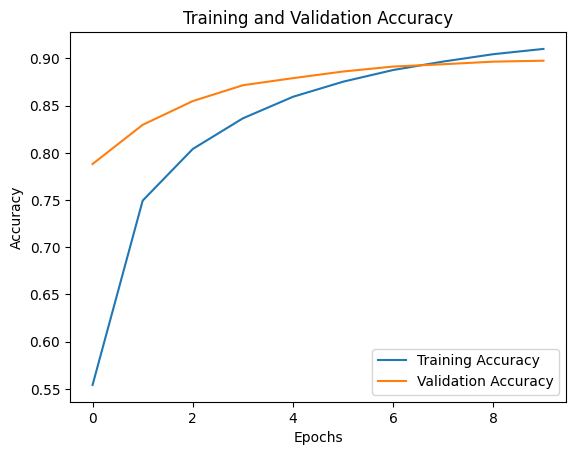

750/750 [==============================] - 2s 3ms/step - loss: 0.3075 - accuracy: 0.8976
Evaluation Set Loss: 0.3075, Test Accuracy: 0.8976
238/238 [==============================] - 1s 5ms/step
Prediction Accuracy on Testing dataset: 0.8987


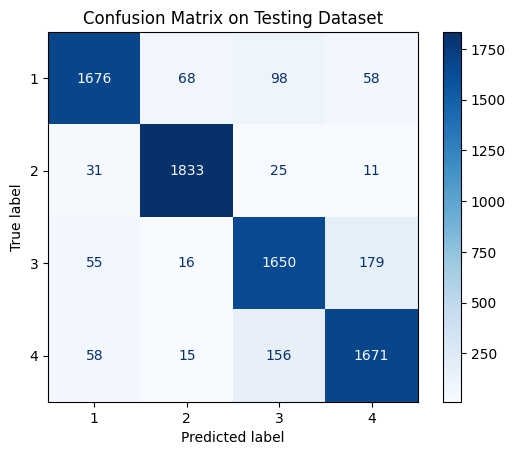

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.backend import clear_session
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Clear the previous session
clear_session()

# Preparation dataset 
X_train, Y_train, X_test, Y_test = prepprocess_dataset()

# SPLITING: Split the data into training and test sets
x_train, x_val, y_train, y_val = train_test_split(X_train['full_text'], Y_train, test_size=0.2, random_state=42)

# ------------------------------ TEXT REPRESENTATION -------------------------------
# The number of words in each description
max_length = 85 # means all input sequences will have a length of 100. Shorter sequences are padded with zeros to ensure uniform input size.
vocab_size = 10000  # or get the length of the feature names from the CountVectorizer

# TOKINIZATION ---------------------------------------

# Create a tokenizer object
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index  # A dictionary mapping each word to a unique integer (e.g., {"the": 1, "cat": 2, "sat": 3}). This is created after fitting the tokenizer.


# CONVERT TOKENS TO SEQUENCE: ----------------------------
# convert text to sequence of tokens and pad them to ensure equal length vectors, process of converting text to numbers, convert separately train and test data.
train_seq = tokenizer.texts_to_sequences(x_train)
val_seq = tokenizer.texts_to_sequences(x_val)
test_seq = tokenizer.texts_to_sequences(X_test['full_text'])

X_train_seq = sequence.pad_sequences(train_seq, maxlen=max_length)
X_val_seq = sequence.pad_sequences(val_seq, maxlen=max_length)
X_test_seq = sequence.pad_sequences(test_seq, maxlen=max_length)

# ENCODING TARGET: -------------------------------------
# Convert labels to 0-based integers (0, 1, 2, 3) and then to one-hot encoding
Y_train_encoder = to_categorical(y_train)
Y_val_encoder = to_categorical(y_val)
Y_test_encoder = to_categorical(Y_test)

# --------------------------------- BUILD CNN --------------------------------------------
model = Sequential()

# EMBEDDING LAYER -------------------------------
embedding_dim = 50   # means each word is represented as a 50-dimensional vector
vocab_size = len(word_index)+1 # or get the length of the feature names from the CountVectorizer
maxlen = max_length # means all input sequences will have a length of 100. horter sequences are padded with zeros to ensure uniform input size.

# Word2Vec EMBEDDING ----------------------------
# Train the Word2Vec model
sentences = [review.split() for review in x_train]
w2v_model = Word2Vec(sentences, vector_size=embedding_dim, window=5, min_count=1, workers=4)
#model = Word2Vec(tokenized_sentences, vector_size=50, window=3, min_count=1, sg=1)  # sg=1 Skip-gram model  , sg=0 CBOW model

# Create an embedding matrix
Word2Vec_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if i < vocab_size:
        if word in w2v_model.wv:  # Access embeddings using w2v_model.wv
            Word2Vec_matrix[i] = w2v_model.wv[word]
        else:
            Word2Vec_matrix[i] = np.random.normal(size=(embedding_dim,))

model.add(Embedding(input_dim=vocab_size, 
                  output_dim=embedding_dim, 
                  input_length=maxlen,
                  weights=[Word2Vec_matrix],
                  trainable=True))

model.build((None, maxlen))  # build the Embedding to initialize the weights

# CONVOLUTIONAL LAYER --------------------------
num_filters = 32  # The number of filters to apply in the convolutional layer
# The enomerus size of filter could lead to over fitting, and the small size could lead to underfitting. the recommended size between 64~32

# The size of the kernel to apply in the convolutional layer. Determines the number of words/tokens the filter covers at once
kernal_size = 2   # means the filter will detect patterns in 5-grams

model.add(Conv1D(filters= num_filters, kernel_size= kernal_size, activation='relu'))  # A 1D convolutional layer that slides over the sequence to detect patterns in the data.

# POOLING LAYER -------------------------------
# Dense layers
model.add(GlobalMaxPooling1D())

# OUTPUT LAYER --------------------------------
model.add(Dense(32, activation='relu')) # Dense layer with 64 neurons
model.add(Dropout(0.5)) # Dropout layer to prevent overfitting
model.add(Dense(Y_train_encoder.shape[1], activation='softmax'))  # # Output layer (Softmax) for multi-class classification

# COMPILE THE MODEL --------------------------- 
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary() # print the model summary.

# ---------------------------------- TRAINING --------------------------------------------
# Larger batch sizes require more memory but can lead to faster training. Smaller batch sizes provide more frequent updates but may introduce noise
batch_size = 250  # Number of samples per gradient update

# A few epochs may result in underfitting, while too many may lead to overfitting.
epochs = 10  # Number of training iterations (adjust based on performance)

# Train the model
training_history = model.fit(X_train_seq, Y_train_encoder, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_data=(X_val_seq, Y_val_encoder))
# VALIDATION DATA: The data used to evaluate the model's performance after each epoch

# Plotting the training and validation accuracy
plt.plot(training_history.history['accuracy'], label='Training Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test set (Evaluation Set)
loss, accuracy = model.evaluate(X_val_seq, Y_val_encoder)
print(f"Evaluation Set Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# ---------------------------------- PREDICTION --------------------------------------------
# Make prediction on testing data and evaluation
Y_predicted = model.predict(X_test_seq)  # Predict on test data
predicted_class = np.argmax(Y_predicted, axis=1)
true_class = np.argmax(Y_test_encoder, axis=1)

# Evaluate the model ------------------------
testing_acc = accuracy_score(true_class, predicted_class)
print(f"Prediction Accuracy on Testing dataset: {testing_acc:.4f}") 

# Confusion matrix ---------------------------
conf_matrix = confusion_matrix(true_class, predicted_class) # Generate the confusion matrix
classes = np.unique(Y_test)  # Get the unique classes from Y_test

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix on Testing Dataset")
plt.show()

## **STEP 5:**

'stopwords' is already downloaded.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 85, 100)           8579500   
                                                                 
 conv1d (Conv1D)             (None, 83, 64)            19264     
                                                                 
 batch_normalization (Batch  (None, 83, 64)            256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 83, 64)            0         
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)       

C:\Users\Engbo\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


700/700 [==============================] - 93s 132ms/step - loss: 1.4079 - accuracy: 0.6203 - val_loss: 0.6802 - val_accuracy: 0.7945 - lr: 0.0010
Epoch 2/25
700/700 [==============================] - 93s 132ms/step - loss: 0.6843 - accuracy: 0.7518 - val_loss: 0.6055 - val_accuracy: 0.8259 - lr: 0.0010
Epoch 3/25
700/700 [==============================] - 90s 128ms/step - loss: 0.5910 - accuracy: 0.7908 - val_loss: 0.5447 - val_accuracy: 0.8469 - lr: 0.0010
Epoch 4/25
700/700 [==============================] - 93s 133ms/step - loss: 0.5320 - accuracy: 0.8157 - val_loss: 0.5095 - val_accuracy: 0.8514 - lr: 0.0010
Epoch 5/25
700/700 [==============================] - 95s 136ms/step - loss: 0.4910 - accuracy: 0.8337 - val_loss: 0.4664 - val_accuracy: 0.8717 - lr: 0.0010
Epoch 6/25
700/700 [==============================] - 96s 138ms/step - loss: 0.4522 - accuracy: 0.8478 - val_loss: 0.4451 - val_accuracy: 0.8658 - lr: 0.0010
Epoch 7/25
700/700 [==============================] - 95s 136ms

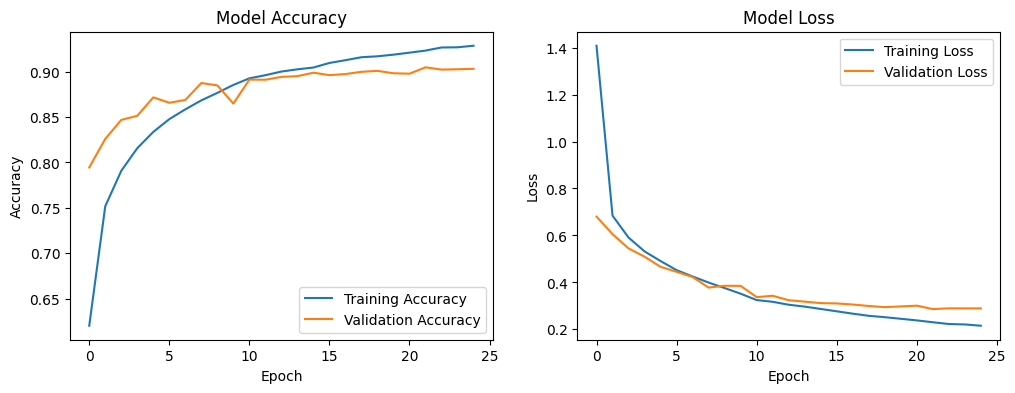

1125/1125 [==============================] - 4s 3ms/step - loss: 0.2864 - accuracy: 0.9048
Evaluation on validation Set, Loss: 0.2864, Test Accuracy: 0.9048
238/238 [==============================] - 1s 3ms/step
Prediction Accuracy on Testing dataset: 0.8983


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import BatchNormalization
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk
from nltk.data import find
from gensim.models import FastText

try:
    find('corpora/stopwords.zip')
    print("'stopwords' is already downloaded.")
except LookupError:
    print("Downloading 'stopwords'...")
    nltk.download('stopwords')

# Clear the previous session
clear_session()

# Preparation dataset 
X_train, Y_train, X_test, Y_test = prepprocess_dataset()

# SPLITING: Split the data into training and test sets
x_train, x_val, y_train, y_val = train_test_split(X_train['full_text'], Y_train, test_size=0.2, random_state=42)

# IMPROVMENT: Preprocess the text data -------------------------------
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

x_train = x_train.apply(preprocess)
x_val = x_val.apply(preprocess)

# PARAMETERS -------------------------------------------------------------
vocab_size = 15000  # The number of unique words in the vocabulary

# ------------------------------ TEXT REPRESENTATION -------------------------------
max_length = 85 # means all input sequences will have a length of 100. Shorter sequences are padded with zeros to ensure uniform input size.

# TOKINIZATION ---------------------------------------
# Create a tokenizer object
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(x_train)

word_index = tokenizer.word_index # A dictionary mapping each word to a unique integer (e.g., {"the": 1, "cat": 2, "sat": 3}). This is created after fitting the tokenizer.

# CONVERT TOKENS TO SEQUENCE: ----------------------------
# convert text to sequence of tokens and pad them to ensure equal length vectors, process of converting text to numbers, convert separately train and test data.
train_seq = tokenizer.texts_to_sequences(x_train)
val_seq = tokenizer.texts_to_sequences(x_val)
test_seq = tokenizer.texts_to_sequences(X_test['full_text'])

X_train_seq = sequence.pad_sequences(train_seq, maxlen=max_length)
X_val_seq = sequence.pad_sequences(val_seq, maxlen=max_length)
X_test_seq = sequence.pad_sequences(test_seq, maxlen=max_length)

# ENCODING TARGET: -------------------------------------
# Convert labels to 0-based integers (0, 1, 2, 3) and then to one-hot encoding
#encoder = LabelEncoder()
Y_train_encoder = to_categorical(y_train)
Y_val_encoder = to_categorical(y_val)
Y_test_encoder = to_categorical(Y_test)

# --------------------------------- BUILD CNN --------------------------------------------
model = Sequential()
# EMBEDDING LAYER -------------------------------
embedding_dim = 100   # means each word is represented as a 50-dimensional vector
vocab_size = len(word_index)+1 # or get the length of the feature names from the CountVectorizer
maxlen = max_length # means all input sequences will have a length of 100. horter sequences are padded with zeros to ensure uniform input size.

# Word2Vec EMBEDDING
# Train FastText on your dataset
sentences = [review.split() for review in x_train]  # Tokenize sentences
fasttext_model = FastText(sentences, vector_size=embedding_dim, window=5, min_count=1, workers=4) 

# Create an embedding matrix
Word2Vec_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if i < vocab_size:
        if word in fasttext_model.wv:  # Check if the word exists in the FastText model
            Word2Vec_matrix[i] = fasttext_model.wv[word]
        else:
            Word2Vec_matrix[i] = np.random.normal(size=(embedding_dim,))

model.add(Embedding(input_dim=vocab_size, 
                  output_dim=embedding_dim, 
                  input_length=maxlen,
                  weights=[Word2Vec_matrix],
                  trainable=True))

model.build((None, maxlen))  # build the Embedding to initialize the weights

# CONVOLUTIONAL LAYER --------------------------
num_filters = 64  # The number of filters to apply in the convolutional layer
kernal_size = 3   # means the filter will detect patterns in 5-grams

# maxlen = 100 # means all input sequences will have a length of 100. Shorter sequences are padded with zeros to ensure uniform input size.
model.add(Conv1D(filters= num_filters, kernel_size= kernal_size, activation='relu'))  # A 1D convolutional layer that slides over the sequence to detect patterns in the data.
model.add(BatchNormalization())  # Add batch normalization
model.add(Dropout(0.6)) # Dropout layer to prevent overfitting

# POOLING LAYER -------------------------------
# Dense layers
model.add(GlobalMaxPooling1D())

# OUTPUT LAYER --------------------------------
model.add(Dense(32, activation='relu')) # Dense layer with 32 neurons
model.add(Dropout(0.6)) # Dropout layer to prevent overfitting
model.add(Dense(Y_train_encoder.shape[1], activation='softmax'))  # # Output layer (Softmax) for multi-class classification

# COMPILE THE MODEL --------------------------- 
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary() # print the model summary.

# IMPROVE: EARLY STOPPING ------------------------------
# Stop training the model if the validation loss does not improve after 5 epochs
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

# ---------------------------------- TRAINING --------------------------------------------
batch_size = 120  # Number of samples per gradient update
epochs = 40  # Number of training iterations (adjust based on performance)

# IMPROVE: Class weights for imbalance (if applicable)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Train the model
training_history = model.fit(X_train_seq, Y_train_encoder, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_data=(X_val_seq, Y_val_encoder),
                    callbacks=[early_stopping, lr_scheduler, checkpoint])

# Plotting the training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_history.history['accuracy'], label='Training Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set (Evaluation Set)
loss, accuracy = model.evaluate(X_val_seq, Y_val_encoder)
print(f"Evaluation on validation Set, Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# ---------------------------------- PREDICTION --------------------------------------------
# Make prediction on testing data and evaluation
Y_predicted = model.predict(X_test_seq)  # Predict on test data
predicted_class = np.argmax(Y_predicted, axis=1)
true_class = np.argmax(Y_test_encoder, axis=1)

# Evaluate the model
testing_acc = accuracy_score(true_class, predicted_class)
print(f"Prediction Accuracy on Testing dataset: {testing_acc:.4f}")  